In [121]:
import numpy as np
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import gensim
from gensim import corpora
from gensim import models
from gensim.models import CoherenceModel
from gensim.models import ldamodel
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models as ges
pyLDAvis.enable_notebook()
import seaborn as sns

In [2]:
# loading the dataset
df = pd.read_csv("K8 Reviews v0.2.csv")
df.head(10)

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...
5,0,Only I'm telling don't buyI'm totally disappoi...
6,1,"Phone is awesome. But while charging, it heats..."
7,0,The battery level has worn down
8,0,It's over hitting problems...and phone hanging...
9,0,A lot of glitches dont buy this thing better g...


In [3]:
df.shape

(14675, 2)

In [4]:
df["sentiment"].value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [5]:
df.isnull().sum()

sentiment    0
review       0
dtype: int64

In [6]:
# normalizing the reviews by converting them to lowercase
df["cleaned_review"] = df["review"].apply(lambda x: x.lower())
df.head(10)

,sentiment,review,cleaned_review
0,1,Good but need updates and improvements,good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr...","worst mobile i have bought ever, battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...
3,1,Good,good
4,0,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...
5,0,Only I'm telling don't buyI'm totally disappoi...,only i'm telling don't buyi'm totally disappoi...
6,1,"Phone is awesome. But while charging, it heats...","phone is awesome. but while charging, it heats..."
7,0,The battery level has worn down,the battery level has worn down
8,0,It's over hitting problems...and phone hanging...,it's over hitting problems...and phone hanging...
9,0,A lot of glitches dont buy this thing better g...,a lot of glitches dont buy this thing better g...


In [8]:
# creating a list containing all the reviews
review_list = [i for i in df["cleaned_review"]]
review_list[:10]

['good but need updates and improvements',
 "worst mobile i have bought ever, battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if i put mobile idle its getting discharged.this is biggest lie from amazon & lenove which is not at all expected, they are making full by saying that battery is 4000mah & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.don't know how lenovo will survive by making full of us.please don;t go for this else you will regret like me.",
 'when i will get my 10% cash back.... its already 15 january..',
 'good',
 'the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone .highly disappointing of amazon',
 "only i'm telling don't buyi'm totally disappointedpoor batterypoor camerawaste of money",
 'phone is awesome. but while charging, it heats up allot..really a genuine reason to hate lenovo k8 note',
 'the battery level has worn down',
 "it'

In [9]:
# tokenizing the reviews
tok_review = [word_tokenize(i) for i in review_list]
tok_review[:10]

[['good', 'but', 'need', 'updates', 'and', 'improvements'],
 ['worst',
  'mobile',
  'i',
  'have',
  'bought',
  'ever',
  ',',
  'battery',
  'is',
  'draining',
  'like',
  'hell',
  ',',
  'backup',
  'is',
  'only',
  '6',
  'to',
  '7',
  'hours',
  'with',
  'internet',
  'uses',
  ',',
  'even',
  'if',
  'i',
  'put',
  'mobile',
  'idle',
  'its',
  'getting',
  'discharged.this',
  'is',
  'biggest',
  'lie',
  'from',
  'amazon',
  '&',
  'lenove',
  'which',
  'is',
  'not',
  'at',
  'all',
  'expected',
  ',',
  'they',
  'are',
  'making',
  'full',
  'by',
  'saying',
  'that',
  'battery',
  'is',
  '4000mah',
  '&',
  'booster',
  'charger',
  'is',
  'fake',
  ',',
  'it',
  'takes',
  'at',
  'least',
  '4',
  'to',
  '5',
  'hours',
  'to',
  'be',
  'fully',
  'charged.do',
  "n't",
  'know',
  'how',
  'lenovo',
  'will',
  'survive',
  'by',
  'making',
  'full',
  'of',
  'us.please',
  'don',
  ';',
  't',
  'go',
  'for',
  'this',
  'else',
  'you',
  'will

In [10]:
# POS tagging
pos_tagged = [nltk.pos_tag(word) for word in tok_review]
pos_tagged[:10]

[[('good', 'JJ'),
  ('but', 'CC'),
  ('need', 'VBP'),
  ('updates', 'NNS'),
  ('and', 'CC'),
  ('improvements', 'NNS')],
 [('worst', 'JJS'),
  ('mobile', 'NN'),
  ('i', 'NN'),
  ('have', 'VBP'),
  ('bought', 'VBN'),
  ('ever', 'RB'),
  (',', ','),
  ('battery', 'NN'),
  ('is', 'VBZ'),
  ('draining', 'VBG'),
  ('like', 'IN'),
  ('hell', 'NN'),
  (',', ','),
  ('backup', 'NN'),
  ('is', 'VBZ'),
  ('only', 'RB'),
  ('6', 'CD'),
  ('to', 'TO'),
  ('7', 'CD'),
  ('hours', 'NNS'),
  ('with', 'IN'),
  ('internet', 'JJ'),
  ('uses', 'NNS'),
  (',', ','),
  ('even', 'RB'),
  ('if', 'IN'),
  ('i', 'JJ'),
  ('put', 'VBP'),
  ('mobile', 'JJ'),
  ('idle', 'NN'),
  ('its', 'PRP$'),
  ('getting', 'VBG'),
  ('discharged.this', 'NN'),
  ('is', 'VBZ'),
  ('biggest', 'JJS'),
  ('lie', 'NN'),
  ('from', 'IN'),
  ('amazon', 'NN'),
  ('&', 'CC'),
  ('lenove', 'NN'),
  ('which', 'WDT'),
  ('is', 'VBZ'),
  ('not', 'RB'),
  ('at', 'IN'),
  ('all', 'DT'),
  ('expected', 'VBN'),
  (',', ','),
  ('they', 'PRP'),


In [11]:
# extracting only nouns
nouns = []
for i in pos_tagged:
    temp = [j[0] for j in i if j[1].startswith("NN")]
    nouns.append(temp)
nouns[:10]

[['updates', 'improvements'],
 ['mobile',
  'i',
  'battery',
  'hell',
  'backup',
  'hours',
  'uses',
  'idle',
  'discharged.this',
  'lie',
  'amazon',
  'lenove',
  'battery',
  'charger',
  'hours',
  'don'],
 ['i', '%', 'cash', '..'],
 [],
 ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon'],
 ['camerawaste', 'money'],
 ['phone', 'allot', '..', 'reason', 'k8'],
 ['battery', 'level'],
 ['problems',
  'phone',
  'hanging',
  'problems',
  'note',
  'station',
  'ahmedabad',
  'years',
  'phone',
  'lenovo'],
 ['lot', 'glitches', 'thing', 'options']]

In [12]:
# Lemmatizing the noun words
lem = WordNetLemmatizer()
lem_list = []
for i in nouns:
    temp = [lem.lemmatize(j) for j in i]
    lem_list.append(temp)
lem_list[:10]

[['update', 'improvement'],
 ['mobile',
  'i',
  'battery',
  'hell',
  'backup',
  'hour',
  'us',
  'idle',
  'discharged.this',
  'lie',
  'amazon',
  'lenove',
  'battery',
  'charger',
  'hour',
  'don'],
 ['i', '%', 'cash', '..'],
 [],
 ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon'],
 ['camerawaste', 'money'],
 ['phone', 'allot', '..', 'reason', 'k8'],
 ['battery', 'level'],
 ['problem',
  'phone',
  'hanging',
  'problem',
  'note',
  'station',
  'ahmedabad',
  'year',
  'phone',
  'lenovo'],
 ['lot', 'glitch', 'thing', 'option']]

In [13]:
# removing stopwords
stop = nltk.corpus.stopwords.words("english")
cleaned_lst = []
for i in lem_list:
    temp = [j for j in i if j not in stop]
    cleaned_lst.append(temp)
cleaned_lst[:10]

[['update', 'improvement'],
 ['mobile',
  'battery',
  'hell',
  'backup',
  'hour',
  'us',
  'idle',
  'discharged.this',
  'lie',
  'amazon',
  'lenove',
  'battery',
  'charger',
  'hour'],
 ['%', 'cash', '..'],
 [],
 ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon'],
 ['camerawaste', 'money'],
 ['phone', 'allot', '..', 'reason', 'k8'],
 ['battery', 'level'],
 ['problem',
  'phone',
  'hanging',
  'problem',
  'note',
  'station',
  'ahmedabad',
  'year',
  'phone',
  'lenovo'],
 ['lot', 'glitch', 'thing', 'option']]

In [14]:
# removing punctuations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
punc = string.punctuation + ".." + "..." + "...." + ".........."
final_lst = []
for i in cleaned_lst:
    temp = [j for j in i if j not in punc]
    final_lst.append(temp)
final_lst[:10]

[['update', 'improvement'],
 ['mobile',
  'battery',
  'hell',
  'backup',
  'hour',
  'us',
  'idle',
  'discharged.this',
  'lie',
  'amazon',
  'lenove',
  'battery',
  'charger',
  'hour'],
 ['cash'],
 [],
 ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon'],
 ['camerawaste', 'money'],
 ['phone', 'allot', 'reason', 'k8'],
 ['battery', 'level'],
 ['problem',
  'phone',
  'hanging',
  'problem',
  'note',
  'station',
  'ahmedabad',
  'year',
  'phone',
  'lenovo'],
 ['lot', 'glitch', 'thing', 'option']]

### Topic modeling with LDA

In [20]:
dictionary = corpora.Dictionary(final_lst)

In [21]:
corpus = [dictionary.doc2bow(i) for i in final_lst]
corpus[:10]

[[(0, 1), (1, 1)],
 [(2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 2),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1)],
 [(14, 1)],
 [],
 [(2, 2), (15, 1), (16, 3), (17, 1)],
 [(18, 1), (19, 1)],
 [(16, 1), (20, 1), (21, 1), (22, 1)],
 [(4, 1), (23, 1)],
 [(16, 2), (17, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)],
 [(30, 1), (31, 1), (32, 1), (33, 1)]]

In [23]:
# lda model with 12 topics
lda_model = models.LdaModel(corpus=corpus, num_topics=12, id2word=dictionary)

In [24]:
lda_model.print_topics()

[(0,
  '0.251*"problem" + 0.084*"heating" + 0.034*"battery" + 0.033*"phone" + 0.024*"network" + 0.023*"smartphone" + 0.021*"camera" + 0.018*"ok" + 0.016*"time" + 0.014*"awesome"'),
 (1,
  '0.161*"battery" + 0.087*"phone" + 0.049*"backup" + 0.024*"issue" + 0.020*"lenovo" + 0.017*"camera" + 0.015*"day" + 0.013*"note" + 0.010*"hour" + 0.010*"hr"'),
 (2,
  '0.062*"phone" + 0.051*"money" + 0.050*"service" + 0.029*"amazon" + 0.027*"waste" + 0.021*"device" + 0.021*"h" + 0.021*"day" + 0.018*"customer" + 0.018*"value"'),
 (3,
  '0.065*"feature" + 0.065*"phone" + 0.042*"screen" + 0.033*"option" + 0.032*"call" + 0.029*"camera" + 0.025*"software" + 0.020*"cast" + 0.017*"bit" + 0.016*"issue"'),
 (4,
  '0.306*"phone" + 0.079*"issue" + 0.039*"network" + 0.028*"camera" + 0.018*"sim" + 0.016*"lenovo" + 0.015*"budget" + 0.014*"jio" + 0.012*"volta" + 0.012*"lot"'),
 (5,
  '0.076*"battery" + 0.044*"camera" + 0.043*"hour" + 0.042*"phone" + 0.029*"day" + 0.027*"quality" + 0.026*"charge" + 0.018*"time" + 0.0

In [26]:
# comuputing the coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=final_lst, dictionary=dictionary , coherence="c_v")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5259466952697348


In [27]:
# determining optimal number of topics 
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_valuesx = range(start, limit, step)

In [28]:
model_list, coherence_values = compute_coherence_values(dictionary = dictionary, corpus = corpus, 
                                                        texts = final_lst , 
                                                        start = 2, limit = 50, step = 1)

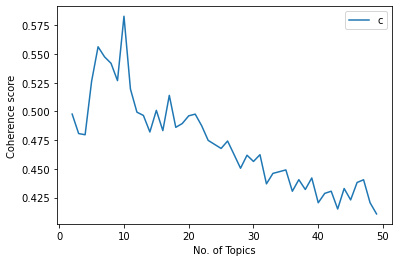

In [90]:
# plot of coherence score for the number of topics
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("No. of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [33]:
for m, cv in zip(x, coherence_values):
    print("No. of Topics =", m, " has Coherence Value of", round(cv, 4))

No. of Topics = 2  has Coherence Value of 0.4977
No. of Topics = 3  has Coherence Value of 0.4807
No. of Topics = 4  has Coherence Value of 0.4797
No. of Topics = 5  has Coherence Value of 0.5262
No. of Topics = 6  has Coherence Value of 0.5563
No. of Topics = 7  has Coherence Value of 0.5475
No. of Topics = 8  has Coherence Value of 0.5419
No. of Topics = 9  has Coherence Value of 0.5268
No. of Topics = 10  has Coherence Value of 0.5828
No. of Topics = 11  has Coherence Value of 0.5194
No. of Topics = 12  has Coherence Value of 0.4994
No. of Topics = 13  has Coherence Value of 0.4965
No. of Topics = 14  has Coherence Value of 0.4821
No. of Topics = 15  has Coherence Value of 0.5009
No. of Topics = 16  has Coherence Value of 0.4833
No. of Topics = 17  has Coherence Value of 0.514
No. of Topics = 18  has Coherence Value of 0.4862
No. of Topics = 19  has Coherence Value of 0.4895
No. of Topics = 20  has Coherence Value of 0.4962
No. of Topics = 21  has Coherence Value of 0.4976
No. of To

Coverence value is the highest (0.583) for number of topics = 10

In [34]:
# lda model with 10 topics
lda_model10 = models.LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [88]:
temp = []
feat_lst = []
for i in lda_model10.print_topics():
    for j in i[1:]:
        temp.append(j.split("+"))

for i in temp:
    temp2 = []
    for j in i:
        temp2.append(j.strip()[7:-1])
    feat_lst.append(temp2)

print((feat_lst)[:2])

[['feature', 'screen', 'glass', 'option', 'cast', 'experience', 'month', 'gorilla', 'facility', 'cost'], ['battery', 'phone', 'problem', 'camera', 'heating', 'backup', 'issue', 'day', 'update', 'life']]


In [89]:
for i in range(10):
    print("Topic",i,":",feat_lst[i])

Topic 0 : ['feature', 'screen', 'glass', 'option', 'cast', 'experience', 'month', 'gorilla', 'facility', 'cost']
Topic 1 : ['battery', 'phone', 'problem', 'camera', 'heating', 'backup', 'issue', 'day', 'update', 'life']
Topic 2 : ['note', 'k8', 'phone', 'lenovo', 'feature', 'sound', 'please', 'issue', 'camera', 'system']
Topic 3 : ['product', 'money', 'price', 'waste', 'mobile', 'value', 'everything', 'camera', 'range', 'delivery']
Topic 4 : ['phone', 'amazon', 'battery', 'service', 'product', 'camera', 'lenovo', 'day', 'issue', 'return']
Topic 5 : ['mobile', 'quality', 'battery', 'performance', 'charger', 'hour', 'camera', 'problem', 'turbo', 'piece']
Topic 6 : ['hai', 'speaker', 'ho', 'phone', 'button', 'power', 'display', 'bhi', 'camera', 'side']
Topic 7 : ['phone', 'issue', 'time', 'network', 'camera', 'price', 'feature', 'sim', 'problem', 'range']
Topic 8 : ['camera', 'quality', 'h', 'mode', 'performance', 'phone', 'superb', 'device', 'depth', 'sensor']
Topic 9 : ['call', 'apps', 

 We can see that Topics 1, 4, 5 seem to be related to issues (battery), ie they are similar topics. Hence, we can further reduce the number of topics.

In [100]:
# lda model with 7 topics
lda_model7 = models.LdaModel(corpus=corpus, num_topics=7, id2word=dictionary, random_state=99)

In [101]:
temp = []
feat_lst = []
for i in lda_model7.print_topics():
    for j in i[1:]:
        temp.append(j.split("+"))

for i in temp:
    temp2 = []
    for j in i:
        temp2.append(j.strip()[7:-1])
    feat_lst.append(temp2)

print((feat_lst)[:2])

[['problem', 'phone', 'update', 'device', 'lenovo', 'handset', 'time', 'hai', 'software', 'issue'], ['phone', 'issue', 'battery', 'network', 'camera', 'heat', 'sim', 'call', 'budget', 'time']]


In [102]:
for i in range(7):
    print("Topic",i,":",feat_lst[i])

Topic 0 : ['problem', 'phone', 'update', 'device', 'lenovo', 'handset', 'time', 'hai', 'software', 'issue']
Topic 1 : ['phone', 'issue', 'battery', 'network', 'camera', 'heat', 'sim', 'call', 'budget', 'time']
Topic 2 : ['battery', 'camera', 'mobile', 'phone', 'quality', 'note', 'problem', 'backup', 'heating', 'charger']
Topic 3 : ['product', 'price', 'money', 'waste', 'range', 'value', 'amazon', 'mobile', 'phone', 'camera']
Topic 4 : ['phone', 'feature', 'screen', 'quality', 'price', 'camera', 'speed', 'processor', 'sensor', 'ram']
Topic 5 : ['phone', 'service', 'time', 'note', 'lenovo', 'h', 'call', 'return', 'k8', 'amazon']
Topic 6 : ['phone', 'camera', 'performance', 'battery', 'feature', 'day', 'quality', 'mode', 'usage', 'depth']


Topic 1: Software update issues

Topic 2: General issues

Topic 3: Battery issues

Topic 4: Price issues

Topic 5: Phone features

Topic 6: Service 

Topic 7: Camera features

In [113]:
# table with topics and their top features
topics = pd.DataFrame({
    "Topics":["Software update issues","General issues","Battery issues","Price issues","Phone features","Service",
              "Camera features"],
    "Terms":feat_lst})
topics

,Topics,Terms
0,Software update issues,"[problem, phone, update, device, lenovo, hands..."
1,General issues,"[phone, issue, battery, network, camera, heat,..."
2,Battery issues,"[battery, camera, mobile, phone, quality, note..."
3,Price issues,"[product, price, money, waste, range, value, a..."
4,Phone features,"[phone, feature, screen, quality, price, camer..."
5,Service,"[phone, service, time, note, lenovo, h, call, ..."
6,Camera features,"[phone, camera, performance, battery, feature,..."


In [117]:
# pyLdavis plot
ges.prepare(lda_model7, corpus, dictionary)

C:\Users\Mithuna\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.090906 -0.112650       1        1  23.087352
6      0.081409 -0.130239       2        1  18.057409
1      0.110425  0.054499       3        1  15.937695
5     -0.011777  0.141923       4        1  12.034107
4     -0.042770 -0.065278       5        1  11.166480
0      0.043315  0.139901       6        1  10.474738
3     -0.271509 -0.028156       7        1   9.242219, topic_info=        Term         Freq        Total Category  logprob  loglift
50   product  2030.000000  2030.000000  Default  30.0000  30.0000
16     phone  6756.000000  6756.000000  Default  29.0000  29.0000
68     price   871.000000   871.000000  Default  28.0000  28.0000
17   problem  1470.000000  1470.000000  Default  27.0000  27.0000
19     money   559.000000   559.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
26    lenovo    54.893159   836.001436   Topic7  -4.9834  -0.3419
17   problem    61.491039  1470.275512   Topic7  -4.8699  -0.7929
79  customer    30.534060   205.176231   Topic7  -5.5699   0.4764
93       day    34.051726   923.148701   Topic7  -5.4609  -0.9185
36     month    30.808894   475.997512   Topic7  -5.5609  -0.3562

[496 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1646      3  0.969031     access
380       4  0.959837  accessory
1396      7  0.955857         ad
1864      4  0.964137    adapter
2008      6  0.973434      alarm
...     ...       ...        ...
29        4  0.076436       year
29        5  0.030574       year
29        6  0.626772       year
4921      5  0.949597          👌
1269      3  0.932793          🔋

[1177 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 7, 2, 6, 5, 1, 4])

In [122]:
temp = []
values = []
for i in lda_model7.print_topics():
    for j in i[1:]:
        temp.append(j.split("+"))

for i in temp:
    temp2 = []
    for j in i:
        temp2.append(j.strip()[:5])
    values.append(temp2)

print((values)[:2])

[['0.065', '0.032', '0.031', '0.025', '0.024', '0.020', '0.017', '0.017', '0.012', '0.011'], ['0.232', '0.062', '0.029', '0.028', '0.019', '0.014', '0.013', '0.012', '0.010', '0.010']]


In [124]:
topic_words = pd.DataFrame({})
for i , topic in enumerate(lda_model7.get_topics()):
    ID = topic.argsort()[-10:][::-1]
    feature = topic[ID]
    words = [dictionary[i] for i in ID]
    df = pd.DataFrame({"Value": feature, "Word":words, "Topic":i})
    topic_words = pd.concat([topic_words, df], ignore_index=True)

In [125]:
topic_words

,Value,Word,Topic
0,0.065475,problem,0
1,0.031586,phone,0
2,0.030826,update,0
3,0.024795,device,0
4,0.024426,lenovo,0
...,...,...,...
65,0.027313,day,6
66,0.012724,quality,6
67,0.012683,mode,6
68,0.010748,usage,6


In [129]:
topic_words["Topic"].replace({0:"Software update issues",1:"General issues",2:"Battery issues",3:"Price issues",4:"Phone features",5:"Service",
              6:"Camera features"}, inplace=True)
topic_words

,Value,Word,Topic
0,0.065475,problem,Software update issues
1,0.031586,phone,Software update issues
2,0.030826,update,Software update issues
3,0.024795,device,Software update issues
4,0.024426,lenovo,Software update issues
...,...,...,...
65,0.027313,day,Camera features
66,0.012724,quality,Camera features
67,0.012683,mode,Camera features
68,0.010748,usage,Camera features


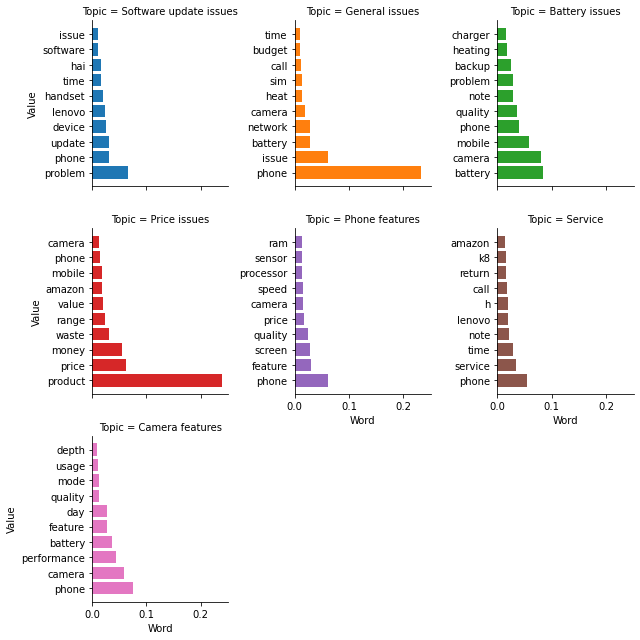

In [131]:
# FacetGrid plot
g = sns.FacetGrid(topic_words, col="Topic", col_wrap=3, sharey=False, hue="Topic")
g.map(plt.barh, "Word", "Value")